<h4> Briefing</h4>
The City of Chicago's renewed in 2021 of their multi-million dollar ShotSpotter contract was controversial.  Later in the same year, the Office of the Inspector General, an independent watchdog funded by taxpayers, released a report which raises questions about the cost-effectiveness of this advanced gunshot detection technology and a possible discriminatory influence on Chicago police officers. In October 2021, leaders of the Flourshing Community Initiative of a faith-based non-profit called Sunshine Gospel Ministries in the Woodlawn Community area on the South Side of Chicago, requested a data detective team to investigate  ShotSpotter data for Chicago Police District 3 (D3).

<h4> In this JNB we will:</h4>
<ul>
    <li> Encode the PTL model of ShotSpotter effectiveness that can be applied to any Chicago police district.  In particular, for each month of shotspotter operation and for each shooting in a specified police district since 1/1/2018, we find the number of ShotSpotter alerts which occured within a distance  $\delta$ km and up to $\tau$ minutes before the shooting incident.</li>
     <li> Defining the $linkage \, ratio$  $\lambda(\delta,\tau)$ as the proportion of shootins which are linked to at least one shotspotter incident, we create a barchart showing the linkage ratio $\lambda(\delta,\tau)$ for the D3.</li>
       <li>  By changing the specified district to 10, we can make a barchart of the linkage ratio for D10 $\lambda(\delta,\tau)$ and compare it with D3. (Chicago Police District 10 includes the La Vilita neighborhood, where a young boy was tragically killed by police responding to a ShotSpotter alert early in 2021.</li>
        
        </ul>
        
In the analysis, we use the threshold parameters $\delta=.3$ km and $\tau=30$ minutes.

<h3> Model Overview</h3>
The Chicago Data Portal contains detailed information about both shotspotter and shooting incidents. However, these data sets are separated, so it is not a simple data analysis to determine which ShotSpotter alerts correspond to which shootings. 

To match Chicago data portal ShotSpotter alerts and shootings, we need to match both spatial and temporal data. The method we propose is called Proximity-Temporal-Linking  PTL, outlined as follows:


<h4>STEP ONE:Construct the P Matrix </h4> First, construct the $n_1$x$n_2$ $proximity \,matrix$ <b>P</b> where the first data set has $n_1$ shooting locations and the second data set has $n_2$ ShotSpotter alert locations. The $p_{ij}$ entry of <b>P</b> gives the distance from the $i^{th}$ shooting ($1\le i \le n_1)$ to the $j^{th}$ ShotSpotter alert ($1\le j\le n_2)$.

<h4> STEP TWO: Construct the T Matrix</h4>
Next, we construct the $n_1$x$n_2$ $temporal\, matrix$ <b>T</b> whose $t_{ij}$ entry gives the difference between the  time of the $i^{th}$ shooting  ($1\le i\le n_1$)  and the time of the  $j^{th}$ ShotSpotter alert ($1\le j \le n_2$). The sign of  $t_{ij}$ is important since we assume that the ShotSpotter incident must occur before a linked shooting ($t_{ij}\ge 0$ ). In other words, if $t_{ij}<0$, then shooting $i$ is not linked to ShotSpotter alert $j$.

<h4> STEP THREE: Compute the linkage marix L</h4>  The linkage matrix <b>L</b> is a binary matrix whose $l_{ij}$ entry equals 1 if the   $i^{th}$ shooting ($1\le i\le n_1$) is predicted by the model to correspond to the  $j^{th}$ ShotSpotter alert ($1\le j \le n_2$).  Note that
\begin{equation}
    L=f(P,T)
\end{equation}
where different choices are possible for the function $f$.  

The simplest choice of $f(P,T)$ is a deterministic $threshold \, model$ which sets a maximum distance $\delta$ and time separation $\tau$ for a ShotSpotter alert and shooting to be linked.

\begin{equation}
    l_{ij} = 1 \,if\,and\,only\,if\, [p_{ij}<\delta \, and \, 0\le t_{ij}<\tau]
\end{equation}

The $linking\, distribution$ $\mathcal{L}(\delta,\tau)$ gives the distribution in the number of ShotSpotter incidents which are linked to a specific shooting.

The $linkage \, ratio \lambda(\delta,\tau)$ gives the proportion of shootings which are linked to a ShotSpotter event. 

<h3> DATA ANALYSIS</h3>
Date: Dec 20, 2021 (20 rows had missing data)

1) Specify the Police District and the threshold parameters

In [1]:
district=3
delta=.3
tau=30

2) Import Libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

3) Import the Chicago ShotSpotter data and filter for the specified district.

In [3]:
ss_raw = pd.read_csv("Shotspotter_through_2021.csv")
ss_raw.columns

Index(['DATE', 'BLOCK', 'ZIP_CODE', 'WARD', 'COMMUNITY_AREA', 'AREA',
       'DISTRICT', 'BEAT', 'STREET_OUTREACH_ORGANIZATION', 'UNIQUE_ID',
       'MONTH', 'DAY_OF_WEEK', 'HOUR', 'INCIDENT_TYPE_DESCRIPTION', 'ROUNDS',
       'ILLINOIS_HOUSE_DISTRICT', 'ILLINOIS_SENATE_DISTRICT', 'LATITUDE',
       'LONGITUDE', 'LOCATION'],
      dtype='object')

In [4]:
ss_raw.head(1)

,DATE,BLOCK,ZIP_CODE,WARD,COMMUNITY_AREA,AREA,DISTRICT,BEAT,STREET_OUTREACH_ORGANIZATION,UNIQUE_ID,MONTH,DAY_OF_WEEK,HOUR,INCIDENT_TYPE_DESCRIPTION,ROUNDS,ILLINOIS_HOUSE_DISTRICT,ILLINOIS_SENATE_DISTRICT,LATITUDE,LONGITUDE,LOCATION
0,12/14/2018 06:10:27 PM,8400 S KEDZIE AVE,60652.0,18.0,ASHBURN,1.0,8.0,835.0,None,SST-50855,12,6,18,MULTIPLE GUNSHOTS,6,31.0,16.0,41.738601,-87.701916,POINT (-87.701916 41.7386005)


In [5]:
shotspotter_raw=ss_raw[["BEAT","DATE","DISTRICT","LATITUDE","LONGITUDE"]]
shotspotter_raw=shotspotter_raw[shotspotter_raw["DISTRICT"]==district]
shotspotter_raw=shotspotter_raw.dropna()  
for i in shotspotter_raw.index:
    x=shotspotter_raw.loc[i,"DATE"]
    x1=x.split(' ')
    x2=x1[0].split('/')
    shotspotter_raw.loc[i,"time"]=x1[1]
    shotspotter_raw.loc[i,'MONTH'] =int(x2[0])
    shotspotter_raw.loc[i,"day"]=x2[1]
    shotspotter_raw.loc[i,"YEAR"]=int(x2[2])
shotspotter_raw=shotspotter_raw.reset_index(drop=True)
shotspotter_raw.head(1)

,BEAT,DATE,DISTRICT,LATITUDE,LONGITUDE,time,MONTH,day,YEAR
0,323.0,11/29/2019 11:57:40 PM,3.0,41.764712,-87.611835,11:57:40,11.0,29,2019.0


4) Read in the shooting  data.

In [6]:
s_raw = pd.read_csv('Shootings_through_2021.csv')
s_raw = s_raw[s_raw["GUNSHOT_INJURY_I"]=='YES']
s_raw.columns


Index(['CASE_NUMBER', 'DATE', 'BLOCK', 'VICTIMIZATION_PRIMARY',
       'INCIDENT_PRIMARY', 'GUNSHOT_INJURY_I', 'UNIQUE_ID', 'ZIP_CODE', 'WARD',
       'COMMUNITY_AREA', 'STREET_OUTREACH_ORGANIZATION', 'AREA', 'DISTRICT',
       'BEAT', 'AGE', 'SEX', 'RACE', 'VICTIMIZATION_FBI_CD', 'INCIDENT_FBI_CD',
       'VICTIMIZATION_FBI_DESCR', 'INCIDENT_FBI_DESCR',
       'VICTIMIZATION_IUCR_CD', 'INCIDENT_IUCR_CD',
       'VICTIMIZATION_IUCR_SECONDARY', 'INCIDENT_IUCR_SECONDARY',
       'HOMICIDE_VICTIM_FIRST_NAME', 'HOMICIDE_VICTIM_MI',
       'HOMICIDE_VICTIM_LAST_NAME', 'MONTH', 'DAY_OF_WEEK', 'HOUR',
       'LOCATION_DESCRIPTION', 'STATE_HOUSE_DISTRICT', 'STATE_SENATE_DISTRICT',
       'UPDATED', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [7]:
shootings_raw = s_raw[["DATE","DISTRICT","BEAT","LATITUDE","LONGITUDE","LOCATION"]]
shootings_raw=shootings_raw[shootings_raw["DISTRICT"]==district]
shootings_raw=shootings_raw.dropna()
for i in shootings_raw.index:
    x=shootings_raw.loc[i,"DATE"]
    x1=x.split(' ')
    x2=x1[0].split('/')
    shootings_raw.loc[i,'YEAR'] =int(x2[2])
    shootings_raw.loc[i,'MONTH'] =int(x2[0])
shootings_raw.columns

Index(['DATE', 'DISTRICT', 'BEAT', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'YEAR',
       'MONTH'],
      dtype='object')

5) Filter the shooting data for D3 and create a column "linked" to indicate which events are linked to shotspotter incidents (note that there might be several linked shooting and shotspotter incidents based on the threshold values).

In [8]:
shootings_raw= shootings_raw[['DATE','YEAR','MONTH','DISTRICT','BEAT','LATITUDE', 'LONGITUDE','LOCATION']]
shootings_raw= shootings_raw.reset_index(drop=True)
shootings_raw['linked'] = 0
shootings_raw.head(2)

,DATE,YEAR,MONTH,DISTRICT,BEAT,LATITUDE,LONGITUDE,LOCATION,linked
0,01/23/1996 04:35:00 PM,1996.0,1.0,3.0,313.0,41.784330,-87.613289,POINT (-87.613288547471 41.784329668947),0
1,02/04/1996 07:00:00 AM,1996.0,2.0,3.0,323.0,41.765432,-87.614685,POINT (-87.61468534612 41.765431654142),0


6) Import libraries used to link positions and times of shotspotter and shooting incidents.

In [9]:
!!pip install geopy
from geopy import distance
import datetime
import re

7) Create variables 'strdate1' and 'strdate2' with date and time information for the 3rd shooting and 1st shot spotter incidents.

In [10]:
pt1 = [shootings_raw.loc[3,"LATITUDE"],shootings_raw.loc[3,"LONGITUDE"]]
pt2 = [shotspotter_raw.loc[1,"LATITUDE"],shotspotter_raw.loc[1,"LONGITUDE"]]
print("Distance between events is ", distance.distance(pt1, pt2).km, ' km')
strdate1 = shootings_raw.loc[3,"DATE"]
strdate2 = shotspotter_raw.loc[1,"DATE"]
date1 = datetime.datetime.strptime(strdate1, "%m/%d/%Y %H:%M:%S %p")
date2 = datetime.datetime.strptime(strdate2, "%m/%d/%Y %H:%M:%S %p")
dt = date1-date2
print(date1)
print(date2)
print("Time between events is ", int(dt.total_seconds()/60))

Distance between events is  2.1105175960629547  km
1996-02-25 12:15:00
2018-02-06 04:12:47
Time between events is  -11543997


8) Define a function to get the linking distribution for a specified year and month

In [11]:
def LD(shooting_data,shotspotter_data,year,month,delta,tau):
    #install libraries
    from geopy import distance
    import datetime
    #get the threshold values
    missing = 0
    delta = delta
    tau = tau
    shotspotter_data = shotspotter_data[shotspotter_data["YEAR"]==year]
    shotspotter_data = shotspotter_data[shotspotter_data["MONTH"]==month]
    shooting_data = shooting_data[shooting_data["YEAR"]==year]
    shooting_data = shooting_data[shooting_data["MONTH"]==month]
    shotspotter_data = shotspotter_data.reset_index(drop = True)
    shooting_data = shooting_data.reset_index(drop=True)
    #define the function to determine linkage of ShotSpotter alerts and shootings based on the threshold values
    def linked(P, T, delta, tau):
        for k in range(P.shape[0]):
            for q in range(P.shape[1]):
                if P[k][q] < delta and T[k][q] < tau and T[k][q] >= 0:
                    shooting_data.loc[k, 'linked'] = shooting_data.loc[k,'linked']+ 1
    #Create the P and T matrices
    P = np.zeros((shooting_data.shape[0], shotspotter_data.shape[0]))
    T = np.zeros((shooting_data.shape[0], shotspotter_data.shape[0]))
    for i in shooting_data.index:
        for j in shotspotter_data.index:
            pt1 = [shooting_data.loc[i,"LATITUDE"],shooting_data.loc[i,"LONGITUDE"]]
            pt2 = [shotspotter_data.loc[j,"LATITUDE"],shotspotter_data.loc[j,"LONGITUDE"]]
            P[i][j] = distance.distance(pt1, pt2).km
            strdate1 = shooting_data.loc[i,"DATE"]
            strdate2 = shotspotter_data.loc[j,"DATE"]
            date1 = datetime.datetime.strptime(strdate1, "%m/%d/%Y %H:%M:%S %p")
            date2 = datetime.datetime.strptime(strdate2, "%m/%d/%Y %H:%M:%S %p")
            dt = date1-date2
            T[i][j] = int(dt.total_seconds() / 60)
    #Apply the function linked to the P and T matrices
    linked(P,T,delta,tau)
    #return the linking distribution
    return shooting_data['linked'].value_counts()

9) Define  a function to get for a specified year the monthly linkage ratio, total number of shootings, and number of linked shootings

In [12]:
def linkageratio(year,delta,tau,shootings_raw,shotspotter_raw):
    tot= [[]] * 12
    linked = [[]] * 12
    ratio = [[]]*12
    L = [[]]*12
    for mo in np.arange(0,12,1):
        L[mo]=LD(shootings_raw,shotspotter_raw,year,mo+1,delta,tau)
        tot[mo] = np.sum(L[mo])
        if 0 in L[mo].index:
            linked[mo] = tot[mo]-L[mo][0]
        else:
            linked[mo] = tot[mo]
        ratio[mo] = linked[mo]/tot[mo]
    return [ratio,linked,tot]

10) Variables used to store for a specified year the monthly total shootings, total linked shootings, and linking ratios.

In [13]:
yrtot= [[]] * 4
yrlinked=[[]]*4
yrratio=[[]]*4

11) Check linkageratio function for the year 2018

In [14]:
[yrratio[0],yrlinked[0],yrtot[0]]=linkageratio(2018,delta,tau,shootings_raw,shotspotter_raw) #year 0 =2018

In [15]:
print(yrratio[0])
print(yrlinked[0])
print(yrtot[0])

[0.0, 0.3333333333333333, 0.4, 0.23076923076923078, 0.5909090909090909, 0.7419354838709677, 0.6538461538461539, 0.5833333333333334, 0.47368421052631576, 0.5789473684210527, 0.3333333333333333, 0.6363636363636364]
[0, 1, 4, 3, 13, 23, 17, 14, 9, 11, 3, 7]
[6, 3, 10, 13, 22, 31, 26, 24, 19, 19, 9, 11]


12)  Run linkageratio function for all 4 years

In [16]:
for i in np.arange(0,4,1):
    [yrratio[i],yrlinked[i],yrtot[i]]=linkageratio(2018+i,delta,tau,shootings_raw,shotspotter_raw)

In [17]:
print(yrratio[0])
print(yrratio[1])
print(yrratio[2])
print(yrratio[3])

[0.0, 0.3333333333333333, 0.4, 0.23076923076923078, 0.5909090909090909, 0.7419354838709677, 0.6538461538461539, 0.5833333333333334, 0.47368421052631576, 0.5789473684210527, 0.3333333333333333, 0.6363636363636364]
[0.3333333333333333, 0.6363636363636364, 0.7777777777777778, 0.3076923076923077, 0.7, 0.6666666666666666, 0.375, 0.6666666666666666, 0.7, 0.5, 0.375, 0.8]
[0.4, 0.8095238095238095, 0.0, 0.4666666666666667, 0.7777777777777778, 0.525, 0.5384615384615384, 0.5, 0.45161290322580644, 0.6363636363636364, 0.6470588235294118, 0.47058823529411764]
[0.2857142857142857, 0.29411764705882354, 0.8076923076923077, 0.46153846153846156, 0.6052631578947368, 0.47368421052631576, 0.56, 0.3783783783783784, 0.6, 0.5882352941176471, 0.6666666666666666, 0.5]


13) Visualize output for 4 years

In [18]:
x = np.arange(0, 12)
avgtot = np.add(np.add(yrtot[0],yrtot[1],),yrtot[2])/3
avglinked = np.add(np.add(yrlinked[0],yrlinked[1],),yrlinked[2])/3
print(avgtot)
print(avglinked)

[ 6.66666667 11.66666667  6.66666667 13.66666667 16.66666667 28.66666667
 22.66666667 23.         23.33333333 17.66666667 11.33333333 12.66666667]
[ 1.66666667  8.33333333  3.66666667  4.66666667 11.33333333 18.
 12.33333333 13.         12.33333333 10.33333333  5.66666667  7.66666667]


In [19]:
yrtot[3] #total shootings in 2020

[21, 17, 26, 13, 38, 38, 50, 37, 25, 17, 21, 28]

In [20]:
## Beat analysis
total_linked = 0
beat_array = [311,312,313,314,321,322,323,324,331,332,333,334]
yrratio_beat = [[]]*4
yrlinked_beat = [[]]*4
yrtot_beat = [[]]*4
for k in beat_array:
    beat = k
    shotspotter=shotspotter_raw[shotspotter_raw["BEAT"]==beat]
    shootings=shootings_raw[shootings_raw["BEAT"]==beat]
    for i in np.arange(0,4,1):
        [yrratio_beat[i],yrlinked_beat[i],yrtot_beat[i]]=linkageratio(2018+i,delta,tau,shootings,shotspotter)
    linked= [(g + h+i+j)  for g, h,i,j in zip(yrlinked_beat[0],yrlinked_beat[1],yrlinked_beat[2],yrlinked_beat[3])]
    total= [(g + h+i+j) for g, h,i,j in zip(yrtot_beat[0],yrtot_beat[1],yrtot_beat[2],yrtot_beat[3])]
    total_linked = total_linked + sum(linked)
    print('Beat ',beat)
    print('2018-21 Total Shooting='+str(sum(total)))
    print('2018-21 Number Linked ='+str(sum(linked)))
    print('2018-21 % Linked ='+str(100*sum(linked)/sum(total)))

C:\Users\pisihara\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in longlong_scalars
  del sys.path[0]


Beat  311
2018-21 Total Shooting=51
2018-21 Number Linked =16
2018-21 % Linked =31.372549019607842
Beat  312
2018-21 Total Shooting=111
2018-21 Number Linked =67
2018-21 % Linked =60.36036036036036
Beat  313
2018-21 Total Shooting=80
2018-21 Number Linked =32
2018-21 % Linked =40.0
Beat  314
2018-21 Total Shooting=21
2018-21 Number Linked =8
2018-21 % Linked =38.095238095238095
Beat  321
2018-21 Total Shooting=105
2018-21 Number Linked =47
2018-21 % Linked =44.76190476190476
Beat  322
2018-21 Total Shooting=105
2018-21 Number Linked =57
2018-21 % Linked =54.285714285714285
Beat  323
2018-21 Total Shooting=93
2018-21 Number Linked =48
2018-21 % Linked =51.61290322580645
Beat  324
2018-21 Total Shooting=78
2018-21 Number Linked =47
2018-21 % Linked =60.256410256410255
Beat  331
2018-21 Total Shooting=90
2018-21 Number Linked =35
2018-21 % Linked =38.888888888888886
Beat  332
2018-21 Total Shooting=96
2018-21 Number Linked =56
2018-21 % Linked =58.333333333333336
Beat  333
2018-21 Total S

In [21]:
print(total_linked)

466


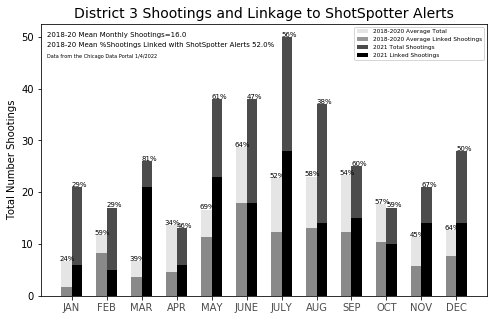

In [22]:
plt.rc('font', size=10)
plt.figure(figsize=[8,5])
plt.bar(x-.15,avgtot,width = .3,color = 'k',alpha=.1)
plt.bar(x-.15,avglinked,width = .3,color = 'k',alpha=.4)
plt.bar(x+.15,yrtot[3],width = .3,color = 'k',alpha=.7)
plt.bar(x+.15,yrlinked[3],width = .3,color = 'k',alpha=1)
ratio= [(g + h+i) / 3 for g, h,i in zip(yrratio[0],yrratio[1],yrratio[2])]
total= [(g + h+i) / 3 for g, h,i in zip(yrtot[0],yrtot[1],yrtot[2])]
for j in np.arange(0,12,1):        
    plt.text(j-.35,total[j]+.1,str(int(round(ratio[j]*100,0)))+'%',size = 7)
for j in np.arange(0,12,1):
        plt.text(j,yrtot[3][j]+.1,str(int(round(yrratio[3][j]*100,0)))+'%',size = 7)
classes=["JAN","FEB","MAR","APR","MAY","JUNE","JULY","AUG","SEP","OCT","NOV","DEC"]
ps = np.arange(len(classes))
plt.xticks(ps, classes, alpha=0.7)
plt.ylabel('Total Number Shootings')
plt.title("District " + str(district)+ " Shootings and Linkage to ShotSpotter Alerts",size=14)
plt.legend(['2018-2020 Average Total','2018-2020 Average Linked Shootings','2021 Total Shootings','2021 Linked Shootings'],loc='upper right',fontsize='xx-small')
plt.text(-.7,50,'2018-20 Mean Monthly Shootings='+str(np.round(np.mean(total),0)),size =7)
plt.text(-.7,48,'2018-20 Mean %Shootings Linked with ShotSpotter Alerts '+ str(100*round(np.mean(ratio),2))+'%',size = 7)
plt.text(-.7,46,'Data from the Chicago Data Portal 1/4/2022',size=5)
plt.savefig("D"+str(district)+"linkage.png")